In [97]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [98]:
df=pd.read_csv('weather.csv', delimiter=',', skipinitialspace=True)
df.tail(24)


,STATION,NAME,DATE,DY,PRCP,TMAX,TMIN
845,USC00036920,"STUTTGART 9 ESE, AR US",2020-09,1,5.26,83.5,65.4
846,USC00036920,"STUTTGART 9 ESE, AR US",2020-10,1,5.58,73.1,53.1
847,USC00036920,"STUTTGART 9 ESE, AR US",2020-11,1,1.71,68.3,46.7
848,USC00036920,"STUTTGART 9 ESE, AR US",2020-12,1,5.58,53.7,35.2
849,USC00036920,"STUTTGART 9 ESE, AR US",2021-01,1,4.25,50.9,35.1
850,USC00036920,"STUTTGART 9 ESE, AR US",2021-02,1,6.72,44.1,27.8
851,USC00036920,"STUTTGART 9 ESE, AR US",2021-03,1,9.26,67.9,48.3
852,USC00036920,"STUTTGART 9 ESE, AR US",2021-04,1,3.52,70.7,50.5
853,USC00036920,"STUTTGART 9 ESE, AR US",2021-05,1,3.65,78.5,60.3
854,USC00036920,"STUTTGART 9 ESE, AR US",2021-06,1,14.06,86.8,70.5


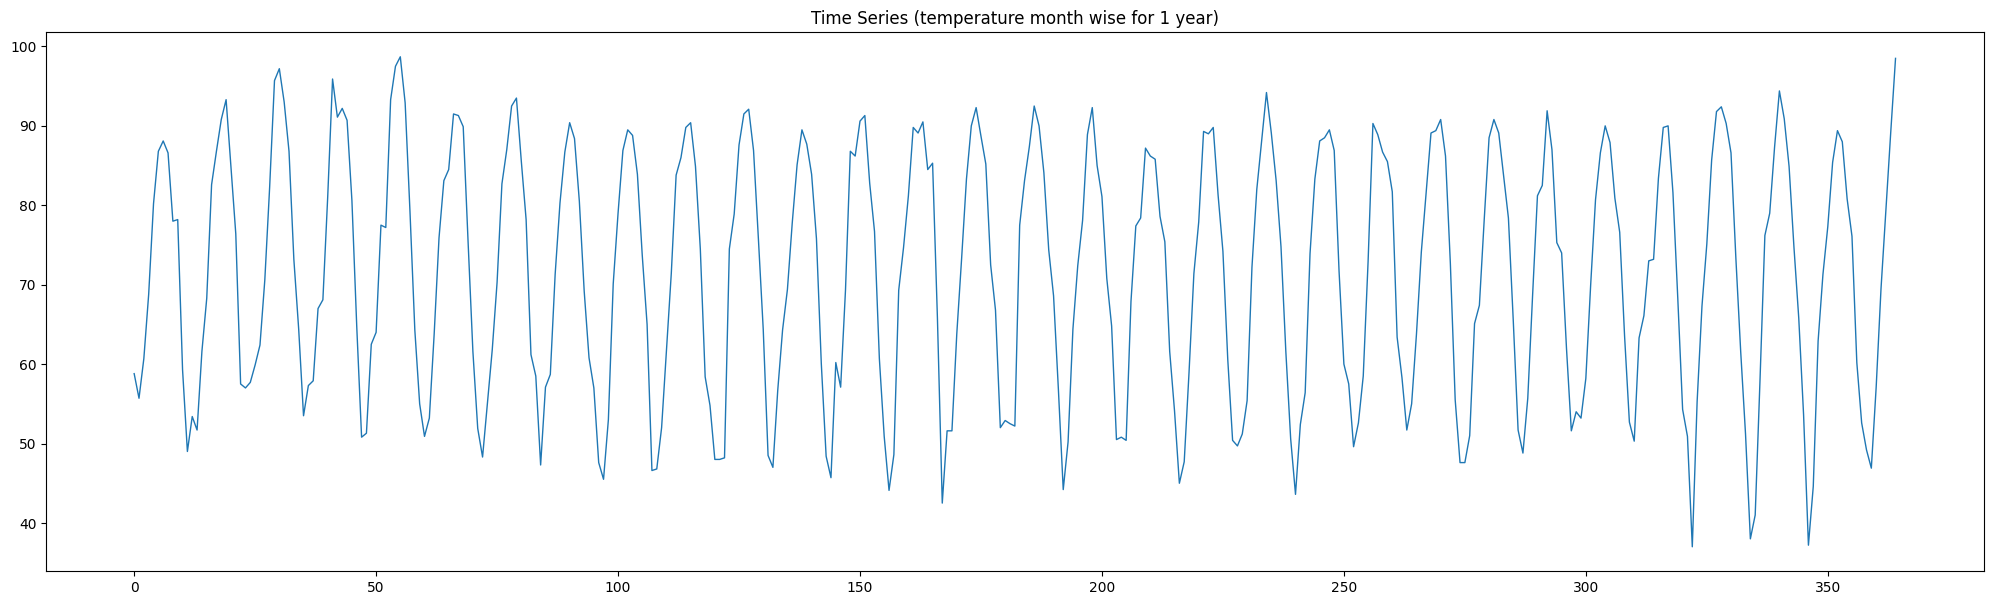

In [99]:
data = pd.DataFrame(list(df['TMAX']), index=df['DY'], columns=['tmax'])
df=data[:365]
df.shape
df.isnull().sum()
df=df.dropna(axis=0)
df.shape
df=df['tmax'].values
df[:5]
df=df.reshape(-1,1)
plt.figure(figsize=(25,7))
plt.plot(df, linewidth=1)
plt.title("Time Series (temperature month wise for 1 year)")
plt.show()

In [100]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df) 
data_scaled[:5]
data_scaled.shape

(365, 1)

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model


In [102]:
steps = 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])
import numpy as np
inp = np.asanyarray(inp)
out = np.asanyarray(out)
len(df)*0.65
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]
y_train = out[:237]
y_test= out[237:]
inp.shape
x_train.shape
x_test.shape

(108, 20, 1)

In [103]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')



In [104]:
model.fit(x_train, y_train, epochs=300, verbose=1,)

Epoch 1/300
8/8 [==============================] - 4s 23ms/step - loss: 0.1879
Epoch 2/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0846
Epoch 3/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0828
Epoch 4/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0724
Epoch 5/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0694
Epoch 6/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0689
Epoch 7/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0677
Epoch 8/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0657
Epoch 9/300
8/8 [==============================] - 0s 19ms/step - loss: 0.0640
Epoch 10/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0612
Epoch 11/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0572
Epoch 12/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0390
Epoch 13/300
8/8 [==============================]

In [105]:
print("Predicted Value", model.predict(x_train)[40][0])
print("Expected value", y_train[40][0])

8/8 [==============================] - 1s 6ms/step
Predicted Value 0.20487176
Expected value 0.2252836304700161


In [135]:
predictions=model.predict(x_test)
print("Predicted Value", predictions[50][0])
print("Expected Value", y_test[50][0])

4/4 [==============================] - 0s 7ms/step
Predicted Value 0.568867
Expected Value 0.5636704119850188


In [136]:
predictions.shape

(108, 1)

In [137]:
y_test.shape

(108, 1)

In [138]:
pred_df=pd.DataFrame(predictions)
pred_df['TrueValues']=y_test
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})
pred_df_new

,Predictions,TrueValues
0,0.906975,0.923221
1,0.970176,0.876404
2,0.933505,0.823970
3,0.794180,0.646067
4,0.580405,0.353933
...,...,...
103,0.347719,0.331461
104,0.537498,0.533708
105,0.735043,0.752809
106,0.887365,0.919476


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

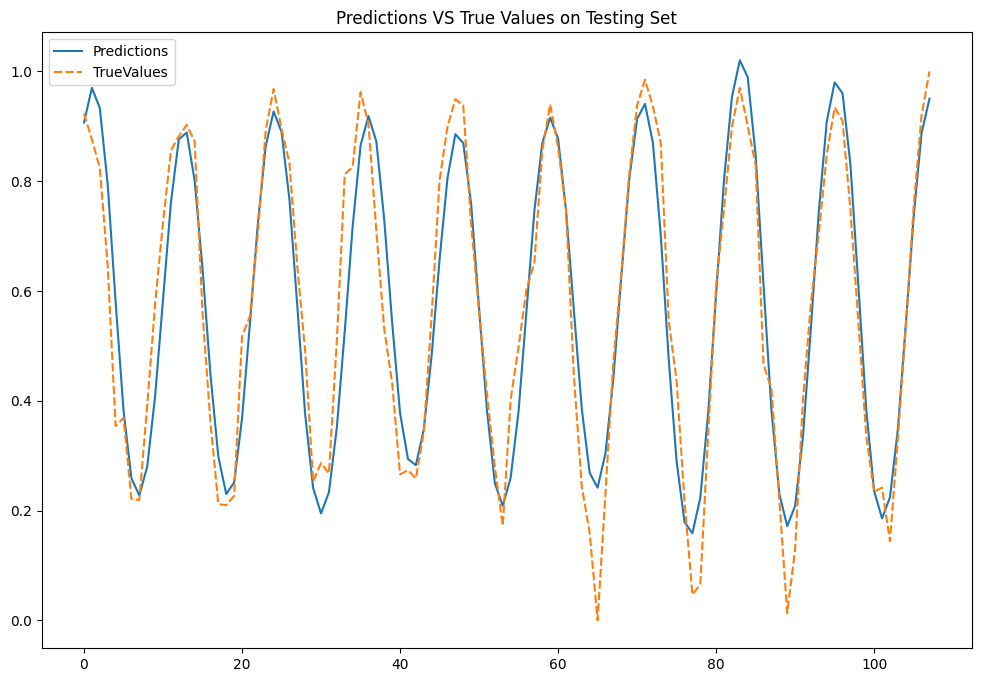

In [139]:
plt.figure(figsize=(12,8))
sns.lineplot(data = pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

In [140]:
data_scaled.shape
x_input=data_scaled[:20]
x_input.shape
x_input = x_input.reshape(1,-1)
x_input.shape
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [141]:
x_input=data_scaled[:20]

In [233]:
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    if(len(temp_input)>20):
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

0 month input [0.19982691 0.27240202 0.42001218 0.61212718 0.78443182 0.8882494
 0.90748274 0.82920939 0.65930814 0.45470273 0.29088819 0.20671766
 0.20600958 0.28521025 0.43759218 0.6291517  0.79515797 0.89079875
 0.9010188  0.81339175]
0 month output [[0.63821906]]
1 month input [0.27240202 0.42001218 0.61212718 0.78443182 0.8882494  0.90748274
 0.82920939 0.65930814 0.45470273 0.29088819 0.20671766 0.20600958
 0.28521025 0.43759218 0.6291517  0.79515797 0.89079875 0.9010188
 0.81339175 0.63821906]
1 month output [[0.4362863]]
2 month input [0.42001218 0.61212718 0.78443182 0.8882494  0.90748274 0.82920939
 0.65930814 0.45470273 0.29088819 0.20671766 0.20600958 0.28521025
 0.43759218 0.6291517  0.79515797 0.89079875 0.9010188  0.81339175
 0.63821906 0.4362863 ]
2 month output [[0.28048596]]
3 month input [0.61212718 0.78443182 0.8882494  0.90748274 0.82920939 0.65930814
 0.45470273 0.29088819 0.20671766 0.20600958 0.28521025 0.43759218
 0.6291517  0.79515797 0.89079875 0.9010188  0.8

In [234]:
lst_output

[[0.6382190585136414],
 [0.4362863004207611],
 [0.28048595786094666],
 [0.20505163073539734],
 [0.21219728887081146],
 [0.29853546619415283],
 [0.45591047406196594],
 [0.6467006206512451],
 [0.8061562180519104],
 [0.8933988213539124],
 [0.8942645788192749],
 [0.7971046566963196],
 [0.6169448494911194],
 [0.4180662930011749],
 [0.27035796642303467],
 [0.2036401629447937],
 [0.21876439452171326],
 [0.312441885471344],
 [0.47476452589035034],
 [0.6644083857536316],
 [0.8170777559280396],
 [0.8957881927490234],
 [0.8870418667793274],
 [0.7802690863609314],
 [0.5955051779747009],
 [0.4001171886920929],
 [0.2606441080570221],
 [0.20266172289848328],
 [0.22587011754512787],
 [0.3270096480846405]]

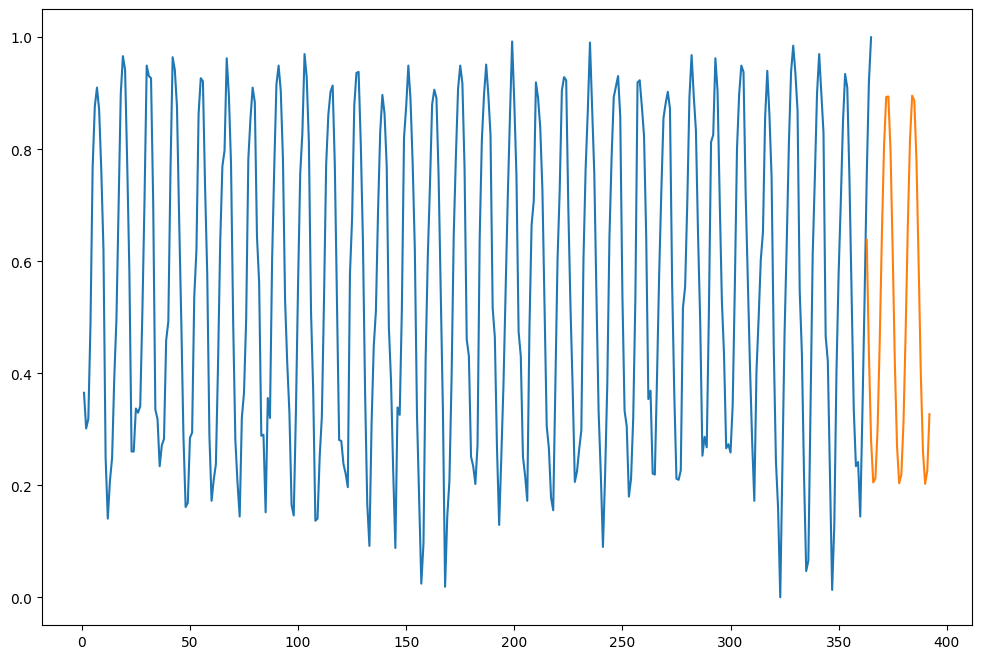

In [235]:
day_new = np.arange(1,366)
day_pred = np.arange(363, 393)
plt.figure(figsize = (12,8))
plt.plot(day_new, data_scaled)
plt.plot(day_pred, lst_output)

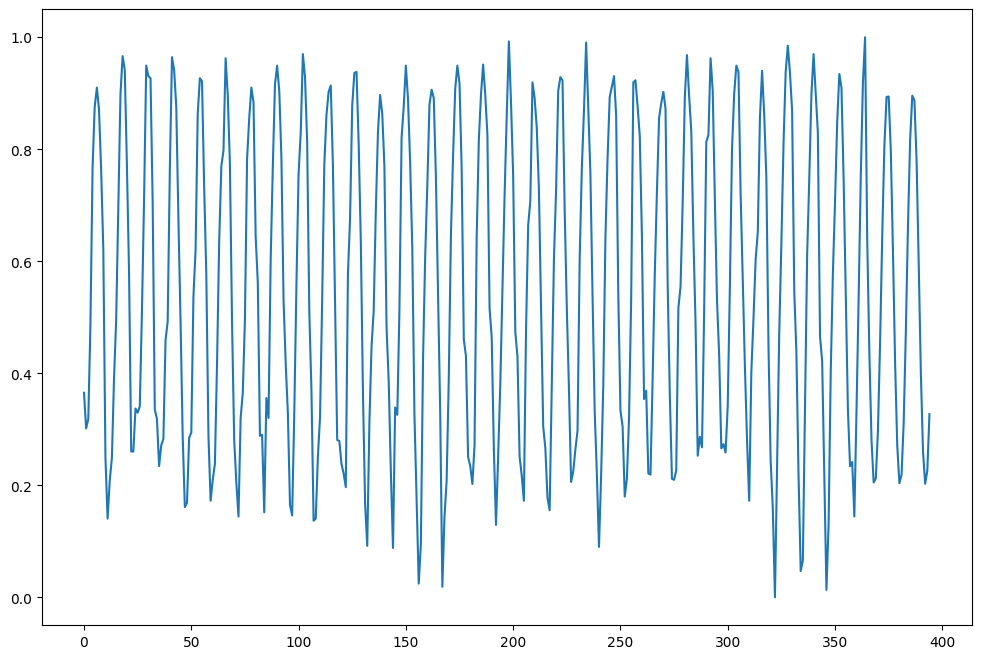

In [236]:
data_scaled[:5]
df3 = data_scaled.tolist()
df3.extend(lst_output)
plt.figure(figsize=(12,8))
plt.plot(df3)

In [238]:
df=pd.read_csv('weather.csv', delimiter=',', skipinitialspace=True)
df.tail(30)

,STATION,NAME,DATE,DY,PRCP,TMAX,TMIN
839,USC00036920,"STUTTGART 9 ESE, AR US",2020-03,1,5.40,67.6,50.2
840,USC00036920,"STUTTGART 9 ESE, AR US",2020-04,1,6.46,69.1,51.0
841,USC00036920,"STUTTGART 9 ESE, AR US",2020-05,1,4.18,79.4,61.2
842,USC00036920,"STUTTGART 9 ESE, AR US",2020-06,1,9.00,87.2,70.1
843,USC00036920,"STUTTGART 9 ESE, AR US",2020-07,1,2.73,90.8,74.4
844,USC00036920,"STUTTGART 9 ESE, AR US",2020-08,1,5.17,89.7,70.7
845,USC00036920,"STUTTGART 9 ESE, AR US",2020-09,1,5.26,83.5,65.4
846,USC00036920,"STUTTGART 9 ESE, AR US",2020-10,1,5.58,73.1,53.1
847,USC00036920,"STUTTGART 9 ESE, AR US",2020-11,1,1.71,68.3,46.7
848,USC00036920,"STUTTGART 9 ESE, AR US",2020-12,1,5.58,53.7,35.2


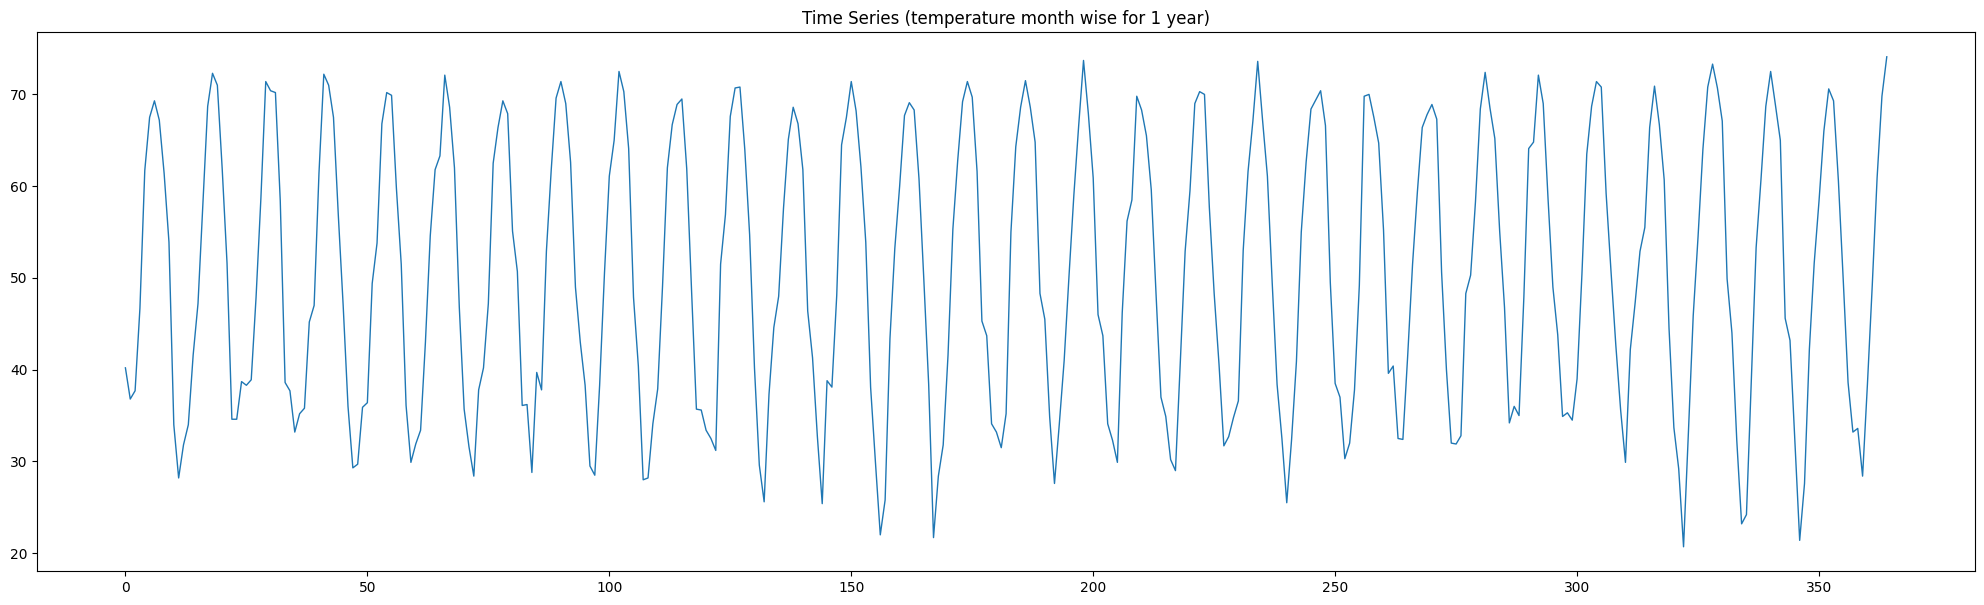

In [239]:
data = pd.DataFrame(list(df['TMIN']), index=df['DY'], columns=['tmin'])
df=data[:365]
df.shape
df.isnull().sum()
df=df.dropna(axis=0)
df.shape
df=df['tmin'].values
df[:5]
df=df.reshape(-1,1)
plt.figure(figsize=(25,7))
plt.plot(df, linewidth=1)
plt.title("Time Series (temperature month wise for 1 year)")
plt.show()

In [240]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df) 
data_scaled[:5]
data_scaled.shape

(365, 1)

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Dense, RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [242]:
steps = 20
inp = []
out = []
for i in range(len(data_scaled) - (steps)):
    inp.append(data_scaled[i:i+steps])
    out.append(data_scaled[i+steps])
import numpy as np
inp = np.asanyarray(inp)
out = np.asanyarray(out)
len(df)*0.65
x_train = inp[:237,:,:]
x_test = inp[237:,:,:]
y_train = out[:237]
y_test= out[237:]
inp.shape
x_train.shape
x_test.shape

(108, 20, 1)

In [243]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(20,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [244]:
model.fit(x_train, y_train, epochs=300, verbose=1,)

Epoch 1/300
8/8 [==============================] - 4s 23ms/step - loss: 0.2108
Epoch 2/300
8/8 [==============================] - 0s 20ms/step - loss: 0.1051
Epoch 3/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0997
Epoch 4/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0851
Epoch 5/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0845
Epoch 6/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0825
Epoch 7/300
8/8 [==============================] - 0s 19ms/step - loss: 0.0811
Epoch 8/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0796
Epoch 9/300
8/8 [==============================] - 0s 21ms/step - loss: 0.0773
Epoch 10/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0680
Epoch 11/300
8/8 [==============================] - 0s 19ms/step - loss: 0.0421
Epoch 12/300
8/8 [==============================] - 0s 20ms/step - loss: 0.0223
Epoch 13/300
8/8 [==============================]

In [245]:
print("Predicted Value", model.predict(x_train)[60][0])
print("Expected value", y_train[60][0])

8/8 [==============================] - 1s 7ms/step
Predicted Value 0.71759033
Expected value 0.6441947565543072


In [246]:
predictions=model.predict(x_test)
print("Predicted Value", predictions[80][0])
print("Expected Value", y_test[80][0])

4/4 [==============================] - 0s 7ms/step
Predicted Value 0.6077869
Expected Value 0.610486891385768


In [247]:
pred_df=pd.DataFrame(predictions)
pred_df['TrueValues']=y_test
pred_df_new = pred_df.rename(columns={ 0: 'Predictions'})
pred_df_new

,Predictions,TrueValues
0,0.901812,0.923221
1,0.957681,0.876404
2,0.913445,0.823970
3,0.763573,0.646067
4,0.538971,0.353933
...,...,...
103,0.328817,0.331461
104,0.532083,0.533708
105,0.734171,0.752809
106,0.882786,0.919476


Text(0.5, 1.0, 'Predictions VS True Values on Testing Set')

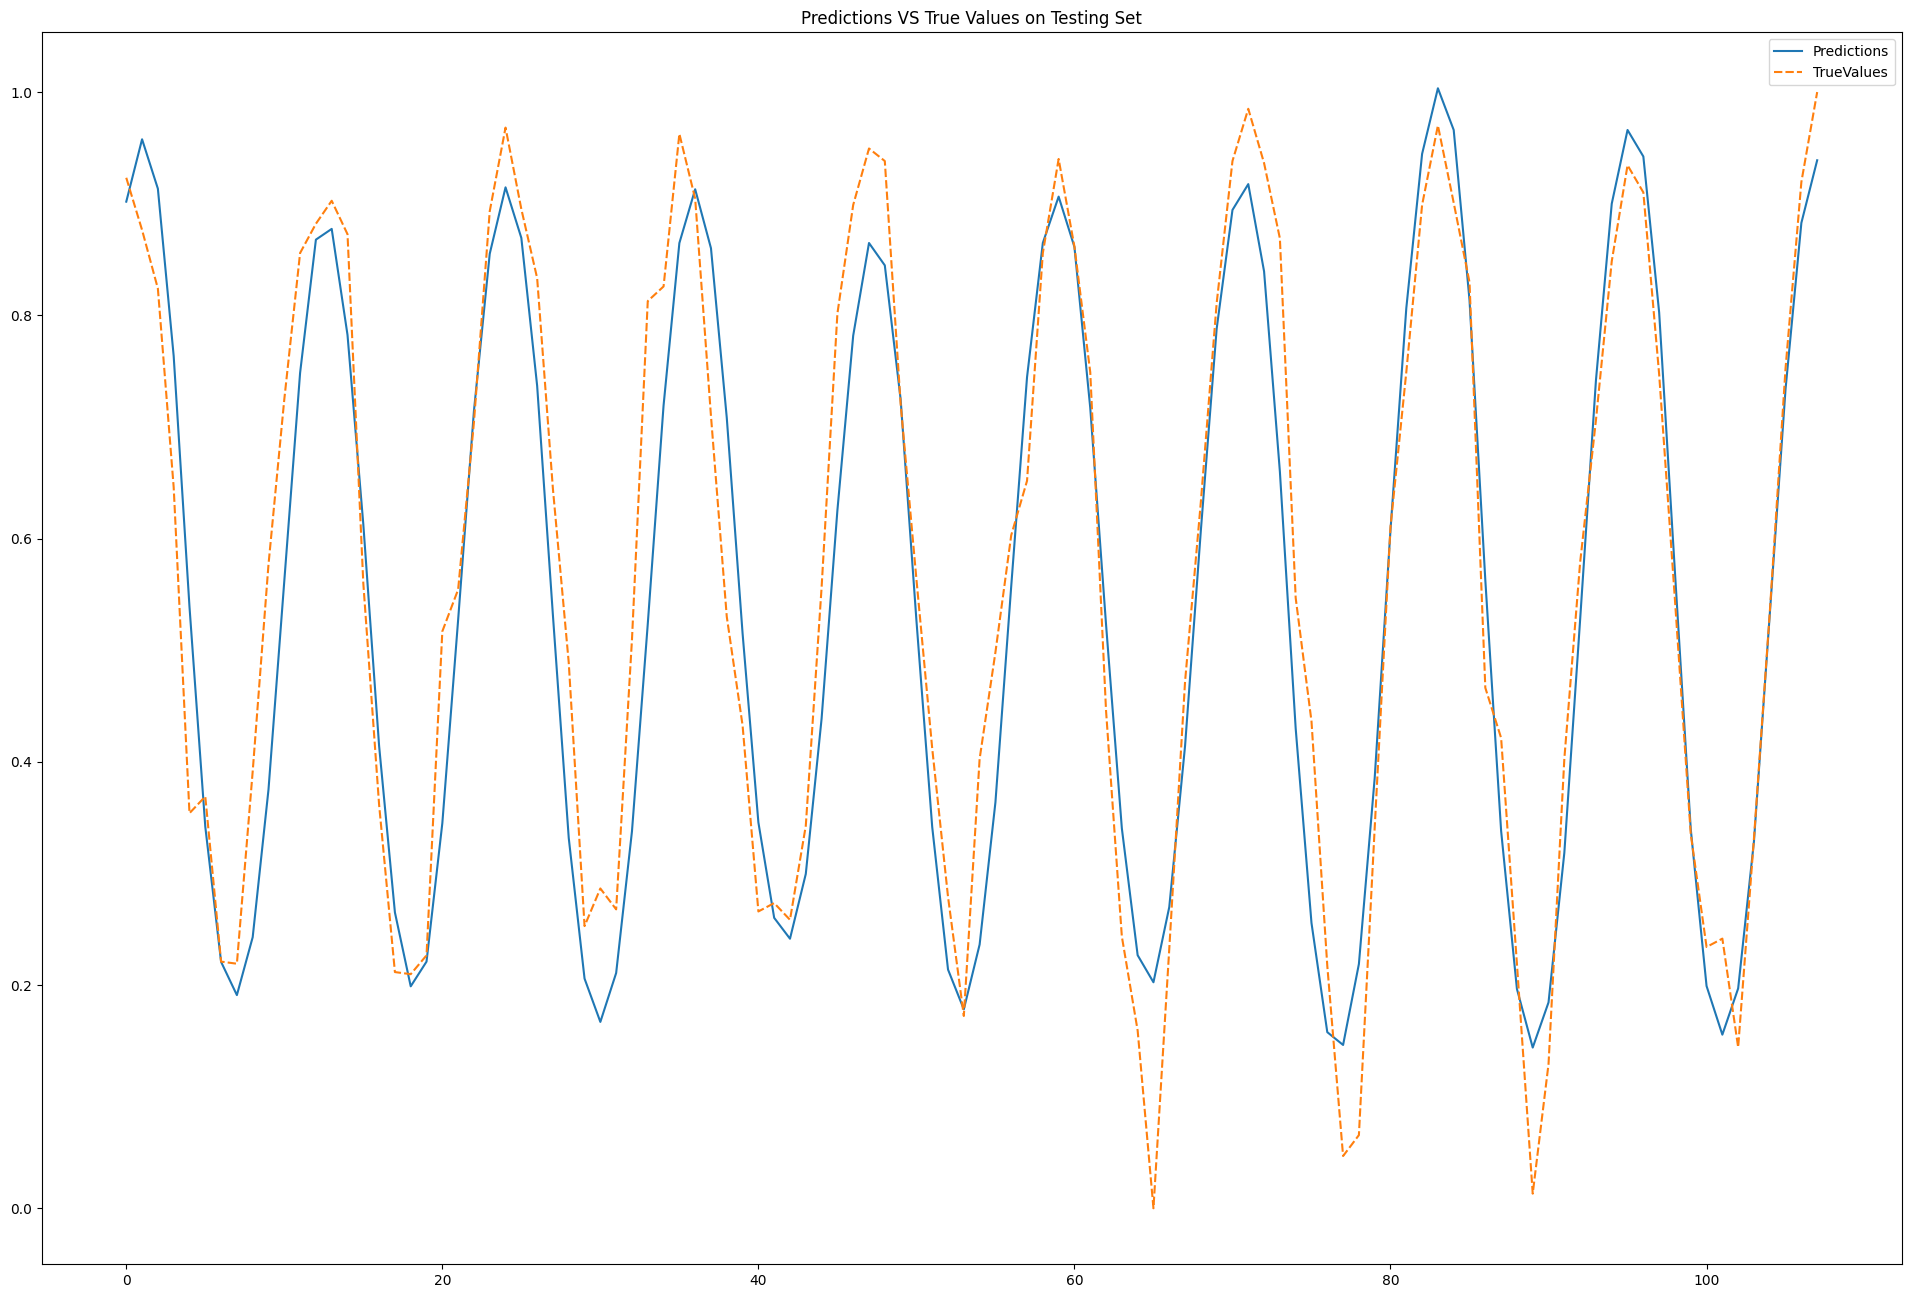

In [248]:
plt.figure(figsize=(24,16))
sns.lineplot(data = pred_df_new)
plt.title("Predictions VS True Values on Testing Set")

In [249]:
data_scaled.shape
x_input=data_scaled[:20]
x_input.shape
x_input = x_input.reshape(1,-1)
x_input.shape
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [250]:
x_input=data_scaled[:20]

In [251]:
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<30):
    if(len(temp_input)>20):
        x_input=np.array(temp_input[1:])
        print("{} month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

[0.7205666]
1 month input [0.30149813 0.31835206 0.48689139 0.76779026 0.87640449 0.91011236
 0.87078652 0.76217228 0.62172285 0.24906367 0.14044944 0.20786517
 0.24906367 0.39138577 0.49625468 0.69662921 0.8988764  0.96629213
 0.94194757 0.72056657]
1 month output [[0.52530456]]
2 month input [0.31835206 0.48689139 0.76779026 0.87640449 0.91011236 0.87078652
 0.76217228 0.62172285 0.24906367 0.14044944 0.20786517 0.24906367
 0.39138577 0.49625468 0.69662921 0.8988764  0.96629213 0.94194757
 0.72056657 0.52530456]
2 month output [[0.33289093]]
3 month input [0.48689139 0.76779026 0.87640449 0.91011236 0.87078652 0.76217228
 0.62172285 0.24906367 0.14044944 0.20786517 0.24906367 0.39138577
 0.49625468 0.69662921 0.8988764  0.96629213 0.94194757 0.72056657
 0.52530456 0.33289093]
3 month output [[0.20447755]]
4 month input [0.76779026 0.87640449 0.91011236 0.87078652 0.76217228 0.62172285
 0.24906367 0.14044944 0.20786517 0.24906367 0.39138577 0.49625468
 0.69662921 0.8988764  0.96629213

In [252]:
lst_output

[[0.7205665707588196],
 [0.5253045558929443],
 [0.33289092779159546],
 [0.20447754859924316],
 [0.16635695099830627],
 [0.22333398461341858],
 [0.3639689087867737],
 [0.5622850656509399],
 [0.7554036378860474],
 [0.8911678194999695],
 [0.9499534964561462],
 [0.8981664180755615],
 [0.739338219165802],
 [0.5258172154426575],
 [0.32803821563720703],
 [0.2058396339416504],
 [0.16829997301101685],
 [0.22005483508110046],
 [0.36299341917037964],
 [0.5686305165290833],
 [0.7679340839385986],
 [0.89600670337677],
 [0.9440244436264038],
 [0.8937195539474487],
 [0.73731929063797],
 [0.5179704427719116],
 [0.3190458416938782],
 [0.19810202717781067],
 [0.16843973100185394],
 [0.2273688167333603]]